### Bank Marketing

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as m
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import roc_auc_score


In [62]:
data=pd.read_csv('/home/pandit/DataScience/CodingNest/Projects/Proj/bank.csv',sep=',',header='infer')

In [63]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [64]:
data = data.drop(['day','poutcome'],axis=1)

In [65]:
def binaryType_(data):
    data.deposit.replace(('yes','no'),(1,0),inplace=True)
    data.default.replace(('yes','no'),(1,0),inplace=True)
    data.housing.replace(('yes','no'),(1,0),inplace=True)
    data.contact.replace(('telephone','cellular','unknown'),(1,2,3),inplace=True)
    data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
    
    return data


In [66]:
#data=binaryType_(data)

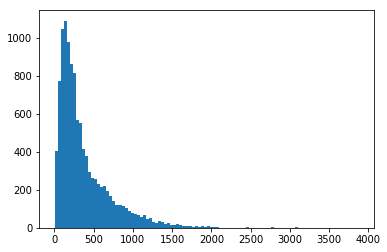

In [67]:
plt.hist((data.duration),bins=100)
plt.show()

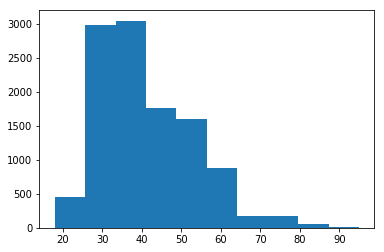

In [68]:
plt.hist(data.age,bins=10)
plt.show()

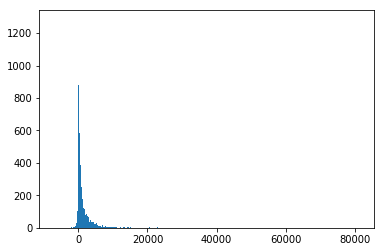

In [69]:
plt.hist(data.balance,bins=1000)
plt.show()

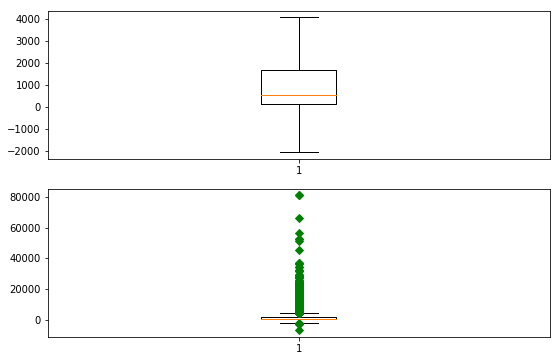

In [70]:
fig=plt.figure(1,figsize=(9,6))
ax1=fig.add_subplot(211)
bp1=ax1.boxplot(data.balance,0,'')
ax2=fig.add_subplot(212)
bp2=ax2.boxplot(data.balance,0,'gD')
plt.show()

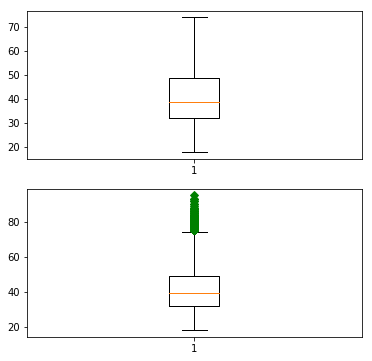

In [71]:
fig=plt.figure(1,figsize=(6,6))
ax=fig.add_subplot(211)
bp=ax.boxplot(data.age,0,'')
ax=fig.add_subplot(212)
bp=ax.boxplot(data.age,0,'gD')
plt.show()

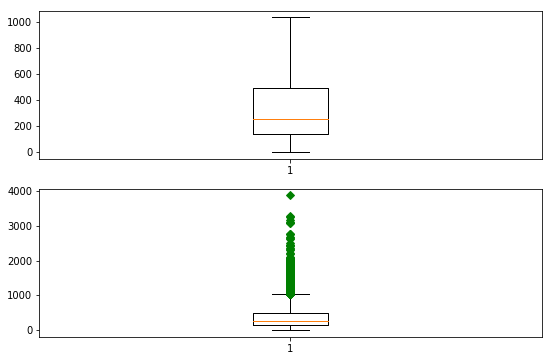

In [72]:
fig=plt.figure(1,figsize=(9,6))
ax1=fig.add_subplot(211)
bp1=ax1.boxplot(data.duration,0,'')
ax2=fig.add_subplot(212)
bp2=ax2.boxplot(data.duration,0,'gD')
plt.show()

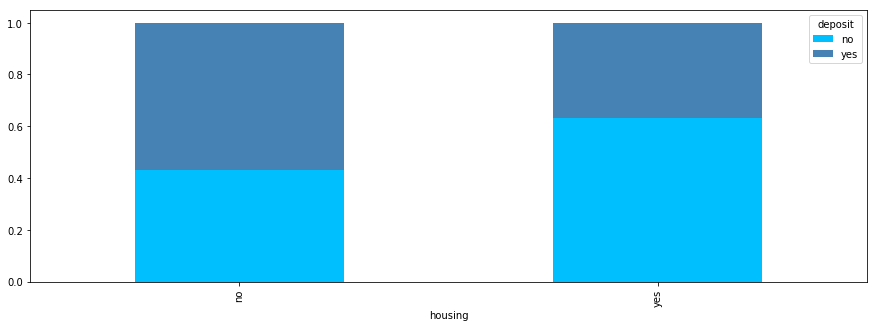

In [73]:
draw_data=pd.crosstab(data.housing,data.deposit)
draw_data.div(draw_data.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,color=['deepskyblue','steelblue'],grid=False,figsize=(15,5))
plt.show()

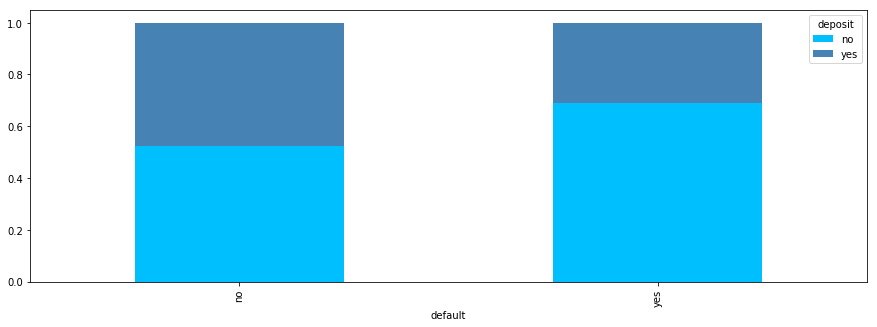

In [74]:
draw_data=pd.crosstab(data.default,data.deposit)
draw_data.div(draw_data.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,color=['deepskyblue','steelblue'],grid=False,figsize=(15,5))
plt.show()

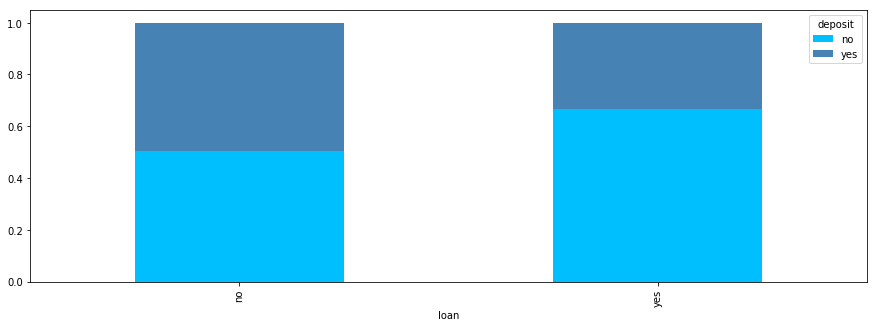

In [75]:
draw_data=pd.crosstab(data.loan,data.deposit)
draw_data.div(draw_data.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,color=['deepskyblue','steelblue'],grid=False,figsize=(15,5))
plt.show()

In [76]:
def age_(data):
    data['Adult']=0
    data['Middle_Aged']=0
    data['old']=0
    data.loc[(data['age']<=35)&(data['age']>=18),'Adult']=1
    data.loc[(data['age']<=60)&(data['age']>=36),'Middle_Aged']=1
    data.loc[data['age']>=61,'old']=1
    
    return data

In [77]:
def campaign_(data):
    
    
    data.loc[data['campaign'] == 1,'campaign'] = 1
    data.loc[(data['campaign'] >= 2) & (data['campaign'] <= 3),'campaign'] = 2
    data.loc[data['campaign'] >= 4,'campaign'] = 3
    
    return data

def duration_(data):
    
    data['t_min'] = 0
    data['t_e_min'] = 0
    data['e_min']=0
    data.loc[data['duration'] <= 5,'t_min'] = 1
    data.loc[(data['duration'] > 5) & (data['duration'] <= 10),'t_e_min'] = 1
    data.loc[data['duration'] > 10,'e_min'] = 1
    
    return data

def pdays_(data):
    data['pdays_not_contacted'] = 0
    data['months_passed'] = 0
    data.loc[data['pdays'] == -1 ,'pdays_not_contacted'] = 1
    data['months_passed'] = data['pdays']/30
    data.loc[(data['months_passed'] >= 0) & (data['months_passed'] <=2) ,'months_passed'] = 1
    data.loc[(data['months_passed'] > 2) & (data['months_passed'] <=6),'months_passed'] = 2
    data.loc[data['months_passed'] > 6 ,'months_passed'] = 3
    
    return data

def previous_(data):
    
    data['Not_Contacted'] = 0
    data['Contacted'] = 0
    data.loc[data['previous'] == 0 ,'Not_Contacted'] = 1
    data.loc[(data['previous'] >= 1) & (data['pdays'] <=99) ,'Contacted'] = 1
    data.loc[data['previous'] >= 100,'Contacted'] = 2
    
    return data

def balance_(data):
    data['Neg_Balance'] = 0
    data['No_Balance'] = 0
    data['Pos_Balance'] = 0
    
    data.loc[~data['balance']<0,'Neg_Balance'] = 1
    data.loc[data['balance'] == 0,'No_Balance'] = 1
    data.loc[(data['balance'] >= 1) & (data['balance'] <= 100),'Pos_Balance'] = 1
    data.loc[(data['balance'] >= 101) & (data['balance'] <= 500),'Pos_Balance'] = 2
    data.loc[(data['balance'] >= 501) & (data['balance'] <= 2000),'Pos_Balance'] = 3
    data.loc[(data['balance'] >= 2001) & (data['balance'] <= 10000),'Pos_Balance'] = 4
    data.loc[data['balance'] >= 10001,'Pos_Balance'] = 5
    
    return data

def job_(data):
    
    data.loc[data['job'] == "management",'job'] = 1
    data.loc[data['job'] == "technician",'job'] = 2
    data.loc[data['job'] == "entrepreneur",'job'] = 3
    data.loc[data['job'] == "blue-collar",'job'] = 4
    data.loc[data['job'] == "retired",'job'] = 5
    data.loc[data['job'] == "admin.",'job'] = 6
    data.loc[data['job'] == "services",'job'] = 7
    data.loc[data['job'] == "self-employed",'job'] = 8
    data.loc[data['job'] == "unemployed",'job'] = 9
    data.loc[data['job'] == "student",'job'] = 10
    data.loc[data['job'] == "housemaid",'job'] = 11
    data.loc[data['job'] == "unknown",'job'] = 12
    
    return data

def marital_(data):
    
    data['married'] = 0
    data['singles'] = 0
    data['divorced'] = 0
    data.loc[data['marital'] == 'married','married'] = 1
    data.loc[data['marital'] == 'singles','singles'] = 1
    data.loc[data['marital'] == 'divorced','divorced'] = 1
    
    return data

def education_(data):
    
    data['primary'] = 0
    data['secondary'] = 0
    data['tertiary'] = 0
    data['unknown'] = 0
    data.loc[data['education'] == 'primary','primary'] = 1
    data.loc[data['education'] == 'secondary','secondary'] = 1
    data.loc[data['education'] == 'tertiary','tertiary'] = 1
    data.loc[data['education'] == 'unknown','unknown'] = 1    
    
    return data

data = campaign_(data)
data = age_(data)
data = education_(data)
data = balance_(data)
data = job_(data)
data = previous_(data)
data = duration_(data)
data = pdays_(data)
data = marital_(data)
print(data.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'deposit', 'Adult', 'Middle_Aged', 'old', 'primary', 'secondary',
       'tertiary', 'unknown', 'Neg_Balance', 'No_Balance', 'Pos_Balance',
       'Not_Contacted', 'Contacted', 't_min', 't_e_min', 'e_min',
       'pdays_not_contacted', 'months_passed', 'married', 'singles',
       'divorced'],
      dtype='object')


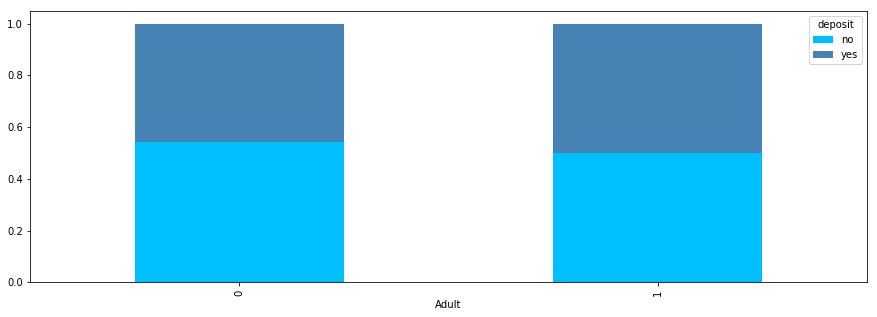

In [78]:
draw_data=pd.crosstab(data.Adult,data.deposit)
draw_data.div(draw_data.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,color=['deepskyblue','steelblue'],grid=False,figsize=(15,5))
plt.show()

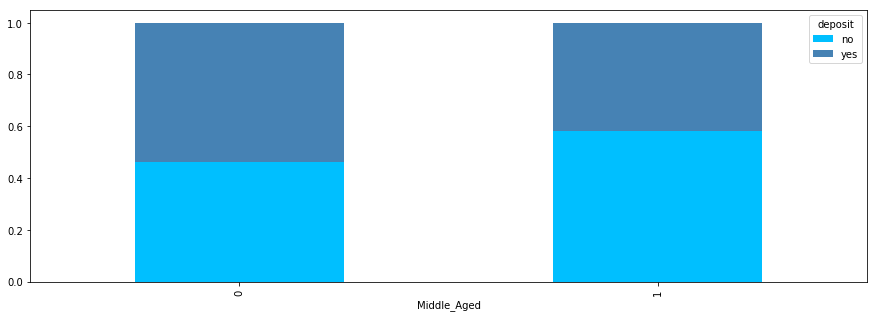

In [79]:
draw_data = pd.crosstab(data.Middle_Aged, data.deposit)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

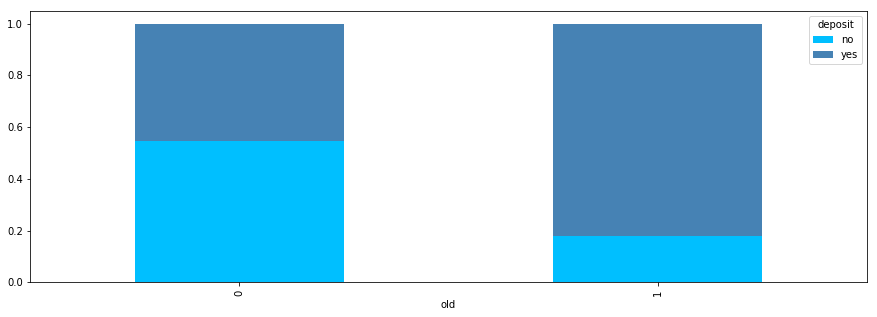

In [80]:
draw_data = pd.crosstab(data.old, data.deposit)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

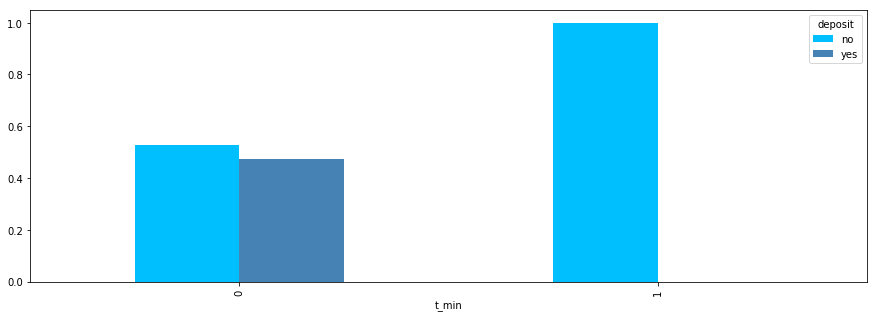

In [81]:
draw_data = pd.crosstab(data.t_min, data.deposit)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

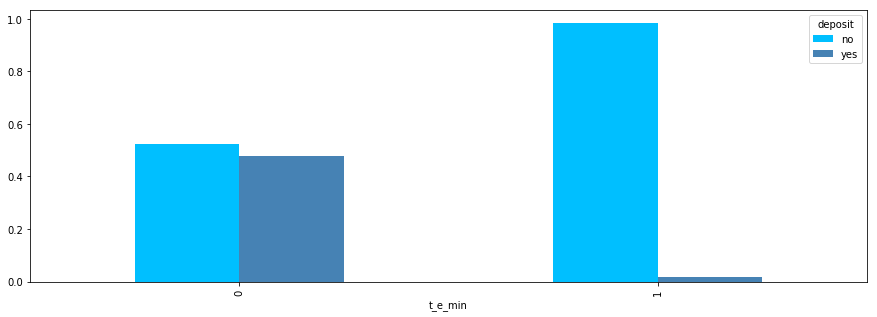

In [82]:
draw_data = pd.crosstab(data.t_e_min, data.deposit)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

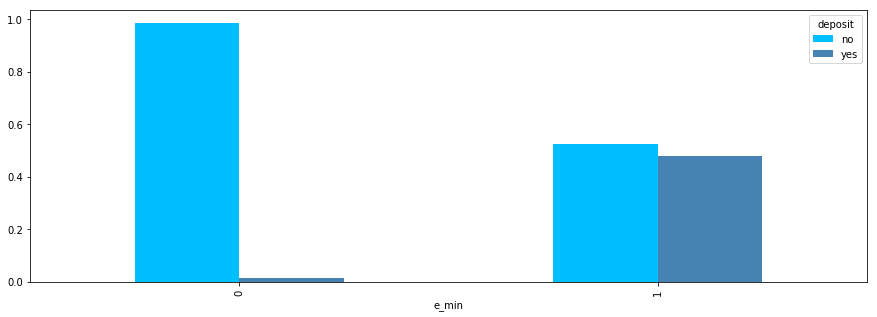

In [83]:
draw_data = pd.crosstab(data.e_min, data.deposit)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

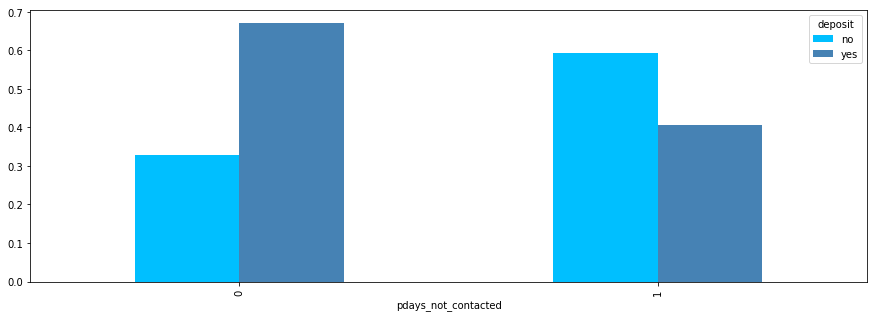

In [84]:
draw_data = pd.crosstab(data.pdays_not_contacted, data.deposit)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

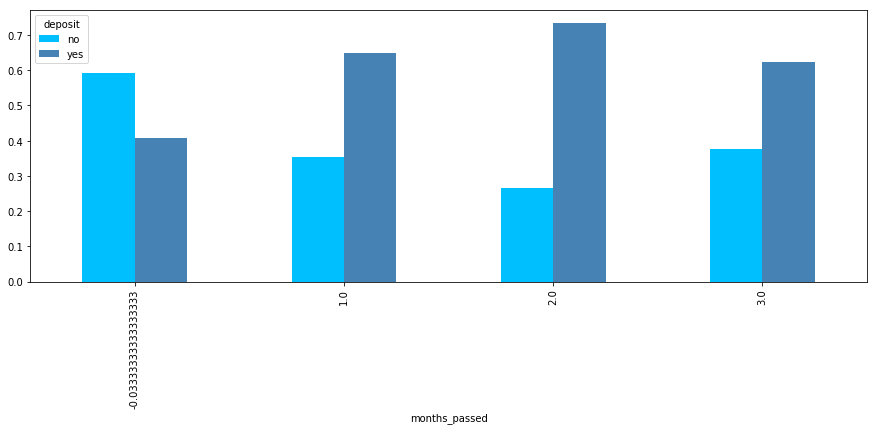

In [85]:
draw_data = pd.crosstab(data.months_passed, data.deposit)
draw_data.div(draw_data.sum(1).astype(int), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

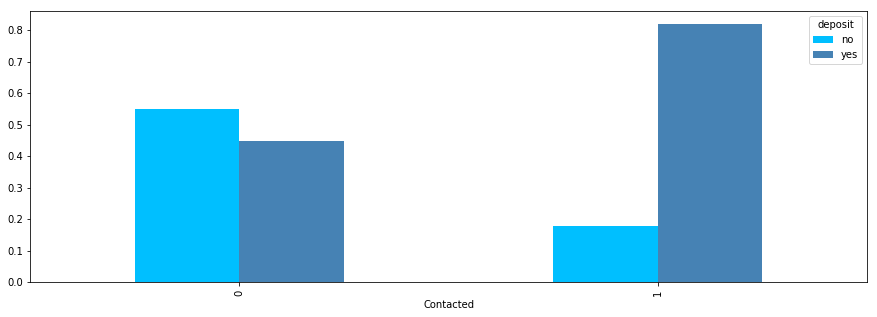

In [86]:
draw_data = pd.crosstab(data.Contacted, data.deposit)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

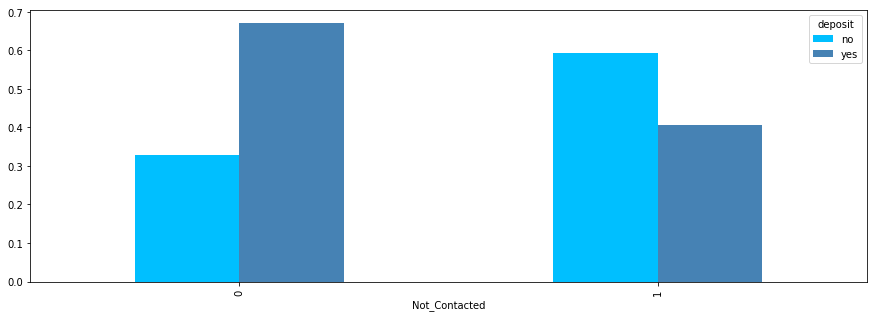

In [87]:
draw_data = pd.crosstab(data.Not_Contacted, data.deposit)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

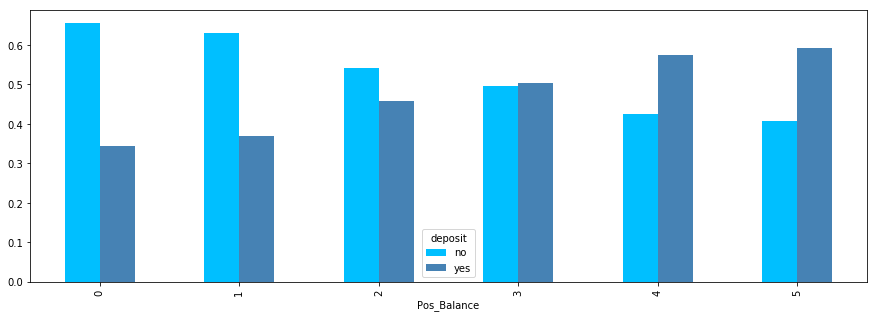

In [88]:
draw_data = pd.crosstab(data.Pos_Balance, data.deposit)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

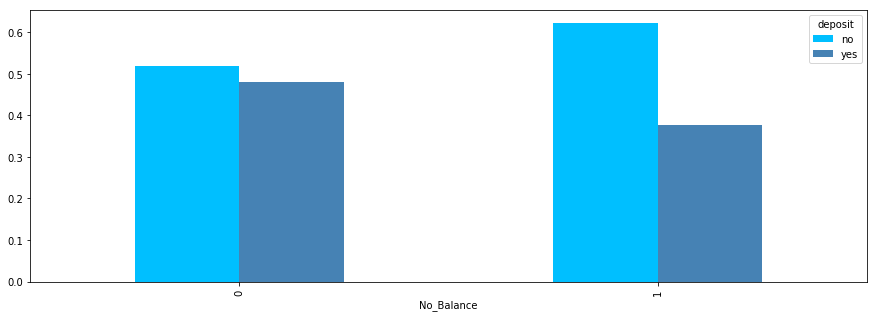

In [89]:
draw_data = pd.crosstab(data.No_Balance, data.deposit)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

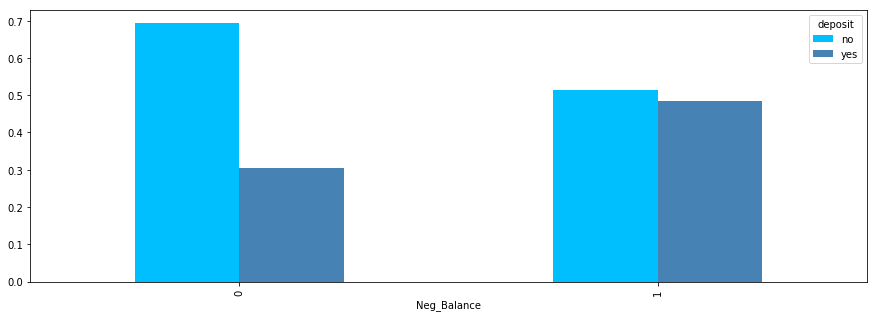

In [90]:
draw_data=pd.crosstab(data.Neg_Balance,data.deposit)
draw_data.div(draw_data.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False,color=['deepskyblue','steelblue'],grid=False,figsize=(15,5))
plt.show()

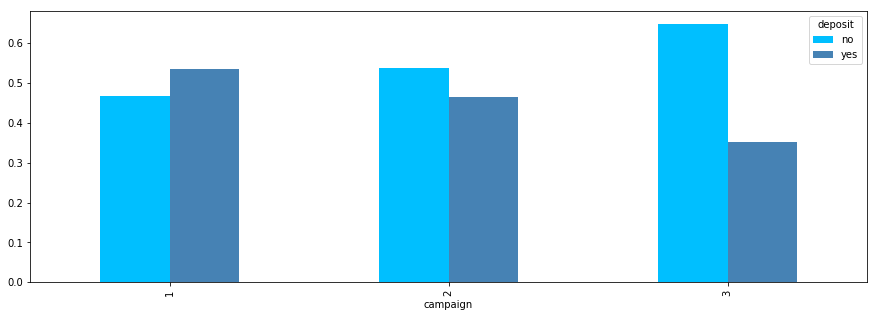

In [91]:
draw_data=pd.crosstab(data.campaign,data.deposit)
draw_data.div(draw_data.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False,color=['deepskyblue','steelblue'],grid=False,figsize=(15,5))
plt.show()

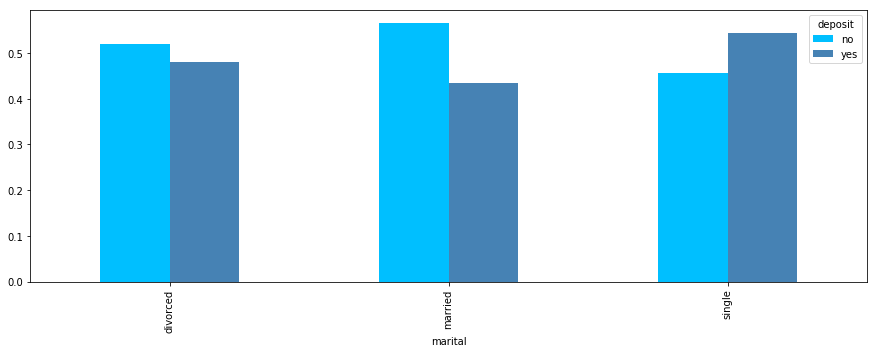

In [92]:
draw_data = pd.crosstab(data.marital, data.deposit)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

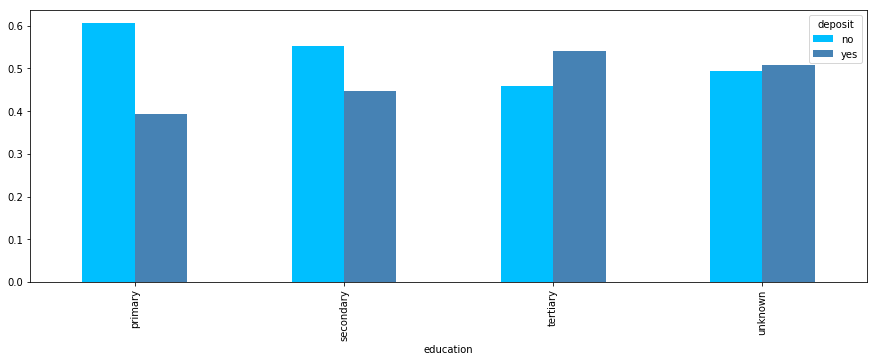

In [93]:
draw_data = pd.crosstab(data.education, data.deposit)
draw_data.div(draw_data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False, color=['deepskyblue','steelblue'],grid=False, figsize=(15, 5))
plt.show()

In [94]:
classifiers = {'Gradient Boosting Classifier':GradientBoostingClassifier(),
               'Adaptive Boosting Classifier':AdaBoostClassifier(),
               'Linear Discriminant Analysis':LinearDiscriminantAnalysis(),
               'Logistic Regression':LogisticRegression(),
               'Random Forest Classifier': RandomForestClassifier(),
               'K Nearest Neighbour':KNeighborsClassifier(8)}
#'Decision Tree Classifier':DecisionTreeClassifier(),'Gaussian Naive Bayes Classifier':GaussianNB(),'Support Vector Classifier':SVC(probability=True),}


In [95]:
data_y = pd.DataFrame(data['deposit'])
data_X = data.drop(['deposit','balance','previous','pdays','age','duration','education','marital'],axis=1)
print(data_X.columns)
log_cols = ["Classifier", 
            "Accuracy",
            "Precision Score",
            "Recall Score",
            "F1-Score",
            "roc-auc_Score"]

Index(['job', 'default', 'housing', 'loan', 'contact', 'month', 'campaign',
       'Adult', 'Middle_Aged', 'old', 'primary', 'secondary', 'tertiary',
       'unknown', 'Neg_Balance', 'No_Balance', 'Pos_Balance', 'Not_Contacted',
       'Contacted', 't_min', 't_e_min', 'e_min', 'pdays_not_contacted',
       'months_passed', 'married', 'singles', 'divorced'],
      dtype='object')


In [98]:
import warnings
warnings.filterwarnings('ignore')
rs = StratifiedShuffleSplit(n_splits=2, test_size=0.2,random_state=0)
rs.get_n_splits(data_X,data_y)
for Name,classify in classifiers.items():
    for train_index, test_index in rs.split(data_X,data_y):
        #print("TRAIN:", train_index, "TEST:", test_index)
        X,X_test = data_X.iloc[train_index], data_X.iloc[test_index]
        y,y_test = data_y.iloc[train_index], data_y.iloc[test_index]
        # Scaling of Features 
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#X = sc_X.fit_transform(X)
#X_test = sc_X.transform(X_test)
        cls = classify
        cls =cls.fit(X,y)
        y_out = cls.predict(X_test)
        accuracy = m.accuracy_score(y_test,y_out)
        precision = m.precision_score(y_test,y_out,average='macro')
        recall = m.recall_score(y_test,y_out,average='macro')
        roc_auc = roc_auc_score(y_out,y_test)
        f1_score = m.f1_score(y_test,y_out,average='macro')
        log_entry = pd.DataFrame([[Name,accuracy,precision,recall,f1_score,roc_auc]], columns=log_cols)
        #metric_entry = pd.DataFrame([[precision,recall,f1_score,roc_auc]], columns=metrics_cols)
        log = log.append(log_entry)
        #metric = metric.append(metric_entry)
        
print(log)
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="g")  
plt.show()

ValueError: could not convert string to float: 'no'

In [60]:
plt.scatter(log['Recall Score'], log['Precision Score'], color='navy',
         label='Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall')
plt.legend(loc="lower left")
plt.show()

NameError: name 'log' is not defined